# Découverte de Miniban Explorer

L'objectif de cette feuille de travail est d'apprendre les bases du contrôle de Miniban Explorer

## Initialisation du robot

Le code suivant initialise le robot. Cela consiste à initialiser les différents composants du robot, et à vérifier qu'ils fonctionnent. Exécute-le.  
(à noter que la cellule n'est pas modifiable)

In [1]:
# import des bibliothèques logicielles nécessaires au contrôle du robot.
# une bibliothèque logicielle est un ensemble de programmes déjà écrit, 
# prêts à être utilisés.
import robot_header
import robot

# Ici, initialise le robot.
bot = robot.Robot()

- connexion aux moteurs ... [ok]
- connexion à la caméra ... [ok]
- Initialisation de l'affichage ... [ok]
- calibration de l'imu ... [ok]
- initialisation procédure de test globale
  - check moteurs:
    [avant gauche] 	temp: 37.0° 	volt: 10.40V  	[ok]
    [arrière gauche] 	temp: 37.0° 	volt: 10.10V  	[ok]
    [avant droit] 	temp: 37.0° 	volt: 10.10V  	[ok]
    [arrière droit] 	temp: 36.0° 	volt: 10.10V  	[ok]
  - check capteurs:
    [dist. avant] ... [ok]
    [dist. droite] ... [ok]
    [dist. gauche] ... [ok]
    [camera] ... [ok]
- procédure de test globale ... [ok]


*Attention, tu ne peux pas éxécuter plusieurs fois le code précédent. Si tu veux le ré-exécuter, il faut relancer le noyau. Pour ce faire, clique en haut dans barre de menu sur "Noyau/Redémarrer", puis exécute la cellule.*  
  

Examinons la sortie du code précédent. Il s'agit de l'initialisation des différents composants du robot: 
- les moteurs des roues. Chaque roue est mue par un moteur indépendant.
- la caméra qui permet de prendre des photos ou bien de filmer.
- le capteur de position (IMU pour "Inertial Measurement Unit"). C'est grâce à ce capteur que le robot connaît son orientation. 
- l'écran d'affichage. Cet écran a un aspect un peu bizarre, c'est du "papier électronique", une technologie d'affichage qui consomme très peu d'énergie

Ensuite s'exécute la procédure de test pour voir si tous les composants fonctionnent bien.
- les premiers tests concernent les moteurs des roues. On vérifie leur température (donnée en degrés celcius). Un moteur qui chauffe, ça n'est jamais trop bon. Cette température ne doit pas excéder 55°. Ensuite, on vérifie leur alimentation en électricité, on appelle ça la tension électrique, elle est mesurée en Volt. Elle doit être un peu au dessus de 10V.
- après cela, on vérifie les capteurs. Et en premier les capteurs de distance, à l'avant, à droite et à gauche. Le test des capteurs est limité, on vérifie seulement que l'on a des valeurs.
- enfin, on vérifie que la caméra est bien connectée.

A tout moment, tu peux relancer la procédure de test avec la commande suivante que tu peux tester.

In [2]:
bot.check()

- initialisation procédure de test globale
  - check moteurs:
    [avant gauche] 	temp: 42.0° 	volt: 10.10V  	[ok]
    [arrière gauche] 	temp: 43.0° 	volt: 10.10V  	[ok]
    [avant droit] 	temp: 42.0° 	volt: 10.00V  	[ok]
    [arrière droit] 	temp: 41.0° 	volt: 10.00V  	[ok]
  - check capteurs:
    [dist. avant] ... [ok]
    [dist. droite] ... [ok]
    [dist. gauche] ... [ok]
    [camera] ... [erreur]
[warning] Erreur procédure de test


False

Tu peux aussi conduire certains tests de façon indépendante. Par exemple vérifier la température des moteurs:

In [3]:
bot.motor_temperature()

(43.0, 43.0, 42.0, 41.0)

ou encore leur tension d'alimentation:

In [4]:
bot.motor_voltage()

(10.100000000000001, 10.0, 10.0, 10.0)

## Déplacement

Dans ce chapitre, nous allons voir comment faire bouger le robot, le faire se déplacer.
Pour commencer, tu peux demander au robot d'avancer:

In [5]:
bot.avance()

[warning] avance: il faut que tu me donnes une vitesse (en cm/s) et/ou bien une distance (en cm)


Et oui ! Il faut être plus précis... Lui dire d'avancer n'est pas suffisant. Il faut dire au robot la distance qu'il doit parcourir, ou bien à quelle vitesse et pendant combien de temps il doit avancer. Par exemple, tu peux lui dire seulement la distance à parcourir (en cm):

In [7]:
bot.avance(distance=10) # le robot avance de 5cm

En fait, cette commande, malgré son nom, peut servir à reculer, pour cela, on met un '-' devant la distance. On lui demande d'"avancer" de -5 cm: 

In [12]:
bot.avance(distance = 5)

A la place de la distance, tu peux lui indiquer la vitesse (en cm/sec) et la durée du déplacement.

In [20]:
bot.avance(vitesse=10, duree=1.5) # le robot avance à la vitesse de 10 cm/sec pendant 1 seconde

Comme précédemment, tu peux lui donner une vitesse négative, dans ce cas, le robot va reculer.  
  
Tu peux lui donner une distance, et une vitesse pour parcourir cette distance (en cm et en cm/sec respectivement):

In [5]:
bot.avance(distance=15, vitesse=5) # le robot parcourt 10cm à la vitesse de 15 cm/s

Dans une certaine mesure, tu peux combiner les paramètres, ici, on donne une distance et une durée pour le déplacement.

In [3]:
bot.avance(distance=5, duree=0.5)

En revanche, tu ne peux pas imposer à la fois la distance, la vitesse et la durée. Tu es d'accord ?...

In [6]:
bot.avance(distance = 5, vitesse = 5, duree = 2)

[warning] avance: si la distance et la vitesse sont donnée, la duree est en trop...


In [19]:
import time
bot.pivote(angle=45)
time.sleep(1)
bot.pivote(angle=45)
time.sleep(1)
bot.pivote(angle=-90)

In [10]:
bot.pivote(angle=-90)

In [ ]:
bot.avance(distance=-10, vitesse=10, duree=2)

In [22]:
bot.avance(distance=15, duree=2)
time.sleep(1)
bot.pivote(angle=90, duree=1)
time.sleep(1)
bot.avance(distance=15,duree=2)
time.sleep(1)
bot.pivote(angle=90, duree=1)
time.sleep(1)
bot.avance(distance=15,duree=2)
time.sleep(1)
bot.pivote(angle=90, duree=1)
time.sleep(1)
bot.avance(distance=15,duree=2)
time.sleep(1)
bot.pivote(angle=90, duree=1)

In [ ]:
bot.pivote(angle=45, duree=0.5)
bot.pivote(angle=-90, duree=1)
bot.pivote(angle=45, duree=0.5)

Ecris un programme `carre1()` qui demande au robot de parcourir un carré de 40cm de côté.

In [ ]:
def carre1():
    # A toi de jouer

Ecris le même programme, mais avec une boucle:

In [ ]:
def carre2():
    for i in [1,2,3,4]:
        # A toi de jouer

Une autre façon de piloter le robot est de lui donner une vitesse instantanée à prendre. Ca peut être très pratique, mais c'est un peu dangeureux car on lui donne une vitesse, il la prend, mais ne s'arrête pas. Il faut aussi lui dire de s'arrêter. C'est pratique parce que, pendant le déplacement, ton programme peut faire autre chose. Typiquement, tu peux faire ça:

In [26]:
import time

bot.avance(vitesse=5) # le robot se met à avancer à 5 cm/s, mais ne s'arrête pas
print("soyez sages !")
time.sleep(1)
print("si si !")
time.sleep(1)
bot.stop() # on coupe les moteurs.

soyez sages !
si si !


## Affichage

In [29]:
bot.print_lines(['Hello world !', 'chut Zoe !', ':-)'])

## Capteurs de distance

Le capteur de distance sert à mesurer la distance entre le robot et un obstacle. Par exemple le capteur avant donne la distance entre le robot et le premier obstacle devant le robot. 
Pour tester ça, place un obstacle devant le robot, et exécute la commande suivante:

In [ ]:
bot.distance('avant')

Le nombre qui s'affiche est la distance mesurée par le capteur en cm.
Déplace un peu l'objet, et ré-excute la commande.  
  
Le robot est muni de 3 capteurs en tout, la commande précédente interrogeait le capteur avant, les deux commandes suivantes interrogent les capteurs gauche et droit. Essaie-les:

In [ ]:
bot.distance('gauche')

In [ ]:
bot.distance('droite')

*Attention, le capteur a une portée maximale. Au delà de 30cm, il retourne une valeur erronée. Il y a aussi une distance minimum de 4cm.*

Tu peux aussi avoir les valeurs des 3 capteurs à la fois:

In [ ]:
bot.distance()

Place un objet devant le robot à environ 5cm.  
Que fait le programme suivant ? Exécutes-le plusieurs fois d'affilée, que constate-tu ?

In [ ]:
import time # on importe la bibliothèque 'time' c'est un détail technique, 
            # pas besoin de le comprendre pour le moment

# On commence par mesurer la distance à l'objet
d = bot.distance('avant')
print ('distance avant le mouvement: %0.2f cm' % d)

if d < 10:
    bot.avance(distance = -2)

time.sleep(0.25) # on attend un peu pour que le robot soit bien immobile

# On mesure de nouveau la distance après le mouvement
d = bot.distance('avant')
print ('distance après le mouvement: %0.2f cm' % d)

Ecris un programme `explore()` pour que le robot avance, petit à petit, jusqu'à ce qu'il rencontre un obstacle à moins de 5 cm, là, il s'arrête.

In [ ]:
def explore():
    # A toi de jouer !

In [ ]:
N = 100
sum = 0.0
for i in range(N):
    sum += bot.distance('avant')
moyenne = sum / N
print ('moyenne de distance : %0.1fcm' % moyenne)

Dans la cellule suivante, on effectue beaucoup de mesure avec le capteur de distance avant (1000 !). Ca prend un peu de temps. Ensuite, on produit un graphique qui représente la répartition de ces mesures. Vous pourrez voir que les mesures varient un peu, on appelle ça le bruit.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time

# Collecte des mesures
nb = 1000
measures = []
for i in range(nb):
    measures.append(bot.distance('avant'))

# Calcul de la moyenne et l'écart-type
npa = np.array(measures)
mean = np.mean(npa)
dev = np.std(npa)
print("Moyenne: %0.2f cm" % mean)
print("Ecart type: %0.2f" % dev)

# Calcul du diagramme en bâtons
int_size = 15*dev
X_max = mean + int_size/2
X_min = mean - int_size/2
N = 50
X = []
for n in range(0,N): X.append(X_min + n*(X_max-X_min)/N)
H = [0]*N
for n in range(0,N-1):
    for m in measures:
        if X[n] <= m and m < X[n+1]: 
            H[n] += 1

# Affichage du graphique
plt.bar(X, H, (X_max-X_min)/N)
plt.grid()
plt.title('Répartition des mesures de distance')
plt.show()

# Orientation

In [ ]:
bot.imu.calib()
bot.imu.reset_orientation()

In [ ]:
bot.imu.get_orientation()

## Déplacements

In [ ]:
bot.avance(3.0,1)

In [ ]:
d1 = bot.distance('avant')
bot.avance(-5.0, 2)
d2 = bot.distance('avant')
print ("déplacement : %0.1fcm" % (d1-d2))

Avancer jusqu'à être à 10cm du mur

In [ ]:
bot.stop()

In [ ]:
import time
import chrono
chr = chrono.Chrono()
vitesse = 5.0
dists = []
temps = []
while True:
    bot.avance(vitesse)
    d = bot.distance('avant')
    dists.append(d)
    temps.append(chr.elapsed())
    if d < 5.0: break
    time.sleep(0.05)
bot.stop()

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
plt.grid()
plt.scatter(temps, dists)
plt.title('mesures du capteur de distance')
plt.show()

In [ ]:
X = np.array(temps)
Y = np.array(dists)
a,b = np.polyfit(X,Y,1)
print ('On obtient comme approximation la droite y = %0.2f x + %0.2f' % (a,b))
print ('cela veut dire que le robot s\'est déplacé à %0.2f cm/s' % a)
print ('rapport (vitesse réelle) / (vitesse théorique) : %0.1f%%' % abs(100*a/vitesse))

In [ ]:
bot.imu.calib(5)

In [ ]:
import time
tgt = -45.0
theta0 = bot.imu.get_orientation()
while True:
    delta_theta = bot.imu.get_orientation() - theta0
    erreur = tgt - delta_theta
    v = -0.2 * erreur
    sign = 1 if v > 0 else -1
    v_abs = abs(v)
    if v_abs < 2: v_abs = 2
    if abs(erreur) > 5 or v_abs > 10: v_abs = 10
    v = sign * v_abs
    bot.pivote(v)
    if abs(erreur) < 1.0: break
    time.sleep(0.01)
bot.stop()
time.sleep(0.250)
print(bot.imu.get_orientation()-theta0)

## Camera

- Enregistrement de l'image dans image.jpg


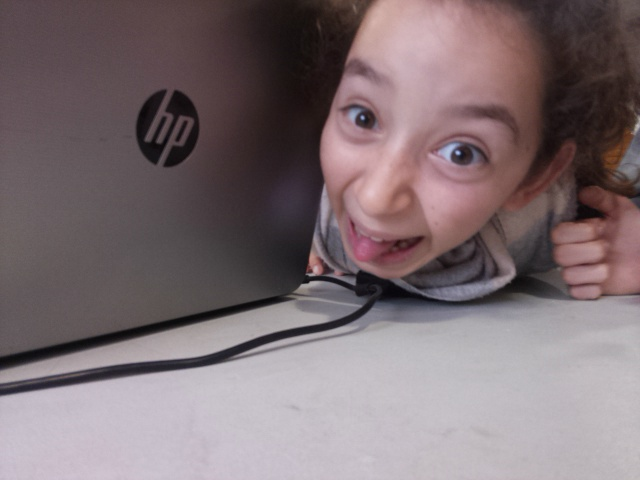

In [35]:
bot.pivote(angle=90)
time.sleep(1)
bot.photo()
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "image.jpg")

In [ ]:
bot.kill()

In [ ]:
import os
os.system('sudo halt')